In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,148,72,35,0,33.6,0.627,50,1,B
1,1,85,66,29,0,26.6,0.351,31,0,C
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,D
4,0,137,40,35,168,43.1,2.288,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
#minmaxScaler
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min() ))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,D
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigened_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

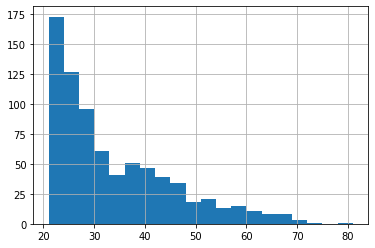

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket= tf.feature_column.bucketized_column(age,boundaries = [20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigened_group,age_bucket]

In [17]:
X_data = diabetes.drop('Class',axis=1)

In [18]:
X_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,D
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.3, random_state=101)

In [22]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Janne\\AppData\\Local\\Temp\\tmpp0buef9w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000012ECBF4D5C0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=train_input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Janne\AppData\Local\Temp\tmpp0buef9w\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 94.3939
INFO:tensorflow:loss = 4.571896,

In [26]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y= y_test, batch_size= 10,num_epochs = 1,shuffle=False)

In [27]:
result = model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T20:24:30Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmpp0buef9w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-16-20:24:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.80888885, auc_precision_recall = 0.6644896, average_loss = 0.5201852, global_step = 1000, label/mean = 0.35064936, loss = 5.0067825, precision = 0.67741936, prediction/mean = 0.35338536, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Janne\AppData\Local\

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size= 10, num_epochs = 1, shuffle = False)

In [29]:
prediction = model.predict(pred_input_func)

In [30]:
my_prediction = list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmpp0buef9w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
my_prediction

[{'logits': array([-0.13819206], dtype=float32),
  'logistic': array([0.46550685], dtype=float32),
  'probabilities': array([0.53449315, 0.46550685], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5359459], dtype=float32),
  'logistic': array([0.6308688], dtype=float32),
  'probabilities': array([0.36913118, 0.63086885], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.52748585], dtype=float32),
  'logistic': array([0.37110347], dtype=float32),
  'probabilities': array([0.62889653, 0.37110344], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)}

In [34]:
my_dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Janne\\AppData\\Local\\Temp\\tmpmcv_fr5k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000012F89A7F048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
my_dnn_model.train(input_fn = train_input_func)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [38]:
# A,B,C,D
em_group_col = tf.feature_column.embedding_column(assigened_group,dimension = 4)

In [39]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,em_group_col,age_bucket]

In [40]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y =y_train, batch_size = 10, num_epochs=1000,shuffle = True)

In [47]:
my_dnn_model = tf.estimator.DNNClassifier([10,20,20,20,10],feature_columns= feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Janne\\AppData\\Local\\Temp\\tmph5i2y5tt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000012ECBCCC860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
my_dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Janne\AppData\Local\Temp\tmph5i2y5tt\model.ckpt.
INFO:tensorflow:loss = 6.913363, step = 0
INFO:tensorflow:global_step/sec: 106.868
INFO:tensorflow:loss = 6.181421, step = 100 (0.937 sec)
INFO:tensorflow:global_step/sec: 132.242
INFO:tensorflow:loss = 3.2879713, step = 200 (0.757 sec)
INFO:tensorflow:global_step/sec: 128.834
INFO:tensorflow:loss = 7.187481, step = 300 (0.776 sec)
INFO:tensorflow:global_step/sec: 132.702
INFO:tensorflow:loss = 4.270282, step = 400 (0.756 sec)
INFO:tensorflow:global_step/sec: 131.361
INFO:tensorflow:loss = 4.143062, step = 500 (0.758 sec)
INFO:tensorflow:global_step/sec: 130.032
INFO:tensorflow:loss = 5.6995535, step = 600 (0.770 sec)
INFO:tensorflow:global_step/sec: 

In [49]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test , batch_size = 10 , num_epochs = 1, shuffle = False)

In [50]:
my_dnn_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T20:45:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmph5i2y5tt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-16-20:45:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.82436216, auc_precision_recall = 0.72950816, average_loss = 0.5147831, global_step = 1000, label/mean = 0.35064936, loss = 4.9547873, precision = 0.58653843, prediction/mean = 0.44282347, recall = 0.75308645
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Janne\AppData\Local\Temp\tmph5i2y5tt\model.ckpt-1000


{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82436216,
 'auc_precision_recall': 0.72950816,
 'average_loss': 0.5147831,
 'label/mean': 0.35064936,
 'loss': 4.9547873,
 'precision': 0.58653843,
 'prediction/mean': 0.44282347,
 'recall': 0.75308645,
 'global_step': 1000}